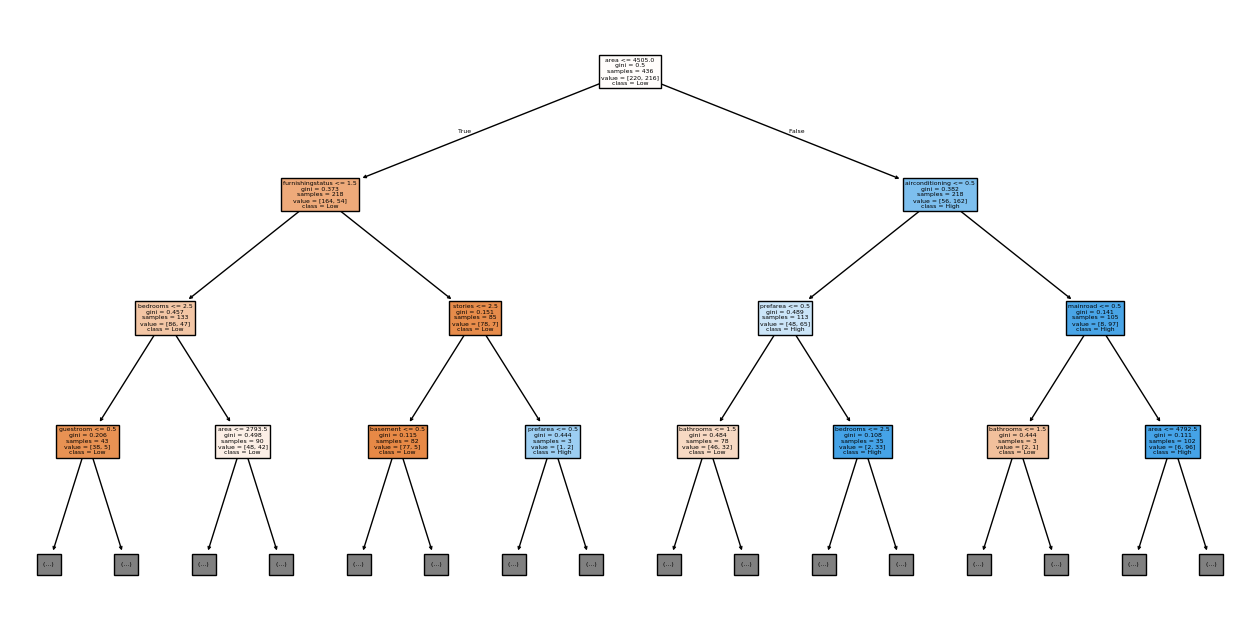

Decision Tree - Train Accuracy: 1.0
Decision Tree - Test Accuracy: 0.7981651376146789
Limited Depth Decision Tree - Test Accuracy: 0.7247706422018348
Random Forest - Test Accuracy: 0.8073394495412844


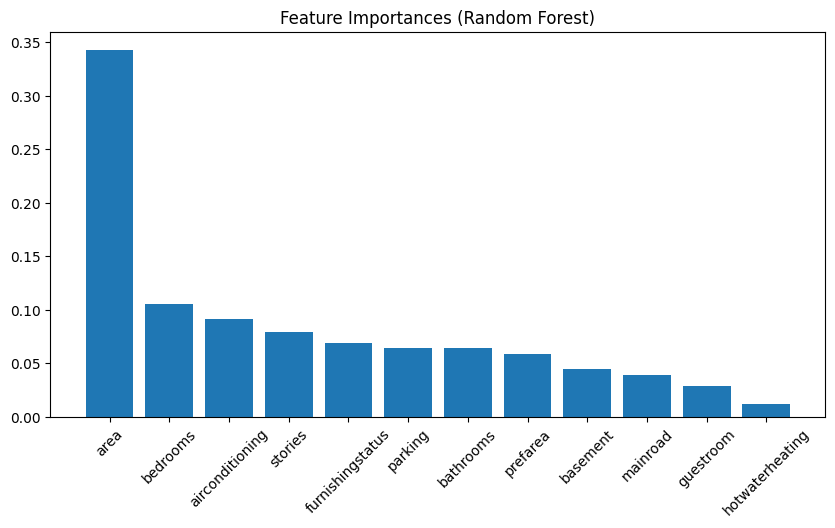

Decision Tree CV Accuracy: 0.7155963302752293
Random Forest CV Accuracy: 0.7559633027522936


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


file_path = "Housing (2).csv"
df = pd.read_csv(file_path)

# Encode categorical variables
le = LabelEncoder()
data = df.copy()
for col in data.select_dtypes(include="object").columns:
    data[col] = le.fit_transform(data[col])

# Convert price into classification target (High = above median, Low = below median)
median_price = data["price"].median()
data["price_class"] = (data["price"] > median_price).astype(int)

# Features and target
X = data.drop(columns=["price", "price_class"])
y = data["price_class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Decision Tree Classifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize first 3 levels of the tree
plt.figure(figsize=(16, 8))
plot_tree(dt, feature_names=X.columns, class_names=["Low", "High"], filled=True, max_depth=3)
plt.show()

print("Decision Tree - Train Accuracy:", dt.score(X_train, y_train))
print("Decision Tree - Test Accuracy:", dt.score(X_test, y_test))


#  Overfitting Analysis (Control Depth)

dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)
print("Limited Depth Decision Tree - Test Accuracy:", dt_limited.score(X_test, y_test))


# Random Forest Classifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest - Test Accuracy:", rf.score(X_test, y_test))


#  Feature Importances (Random Forest)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.title("Feature Importances (Random Forest)")
plt.show()


#  Cross-Validation

cv_scores_dt = cross_val_score(dt, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy:", cv_scores_dt.mean())
print("Random Forest CV Accuracy:", cv_scores_rf.mean())
